# Plotting Figures 3-5
#### Notebook for creating figures 3-5 from Callahan et al., JGR, 2019
#### "Multi-index attribution of extreme winter air quality in Beijing, China"
#### By Christopher Callahan
#### Christopher.W.Callahan.GR@dartmouth.edu

This notebook just creates the plots inline without saving them, but you can save them by adding plt.savefig(<desired-filepath>) after each set of plotting commands.

In [40]:
import numpy as np
import sys
import os
import datetime
import pandas as pd
import seaborn as sns
import pyreadr
import matplotlib.pyplot as plt
from statistics import median
from matplotlib import rcParams
import matplotlib.font_manager

Set data import location.
You'll have to do this yourself!

In [41]:
loc_in = YOUR DIRECTORY

#### Figure 3: Return period ratios

Read in ratios for each index

In [42]:
ratios_hwi = pyreadr.read_r(loc_in+"RATIOS_HWI.rds")
ratios_hwi_result = ratios_hwi[None]
hwi_hist_cn = ratios_hwi_result["ratios_hist_ctrl"]
hwi_dt_orig = ratios_hwi_result["ratios_dt_orig"]

ratios_wmi = pyreadr.read_r(loc_in+"RATIOS_WMI.rds")
ratios_wmi_result = ratios_wmi[None]
wmi_hist_cn = ratios_wmi_result["ratios_hist_ctrl"]
wmi_dt_orig = ratios_wmi_result["ratios_dt_orig"]

ratios_ppi = pyreadr.read_r(loc_in+"RATIOS_PPI1.rds")
ratios_ppi_result = ratios_ppi[None]
ppi_hist_cn = ratios_ppi_result["ratios_hist_ctrl"]
ppi_dt_orig = ratios_ppi_result["ratios_dt_orig"]

Plot!

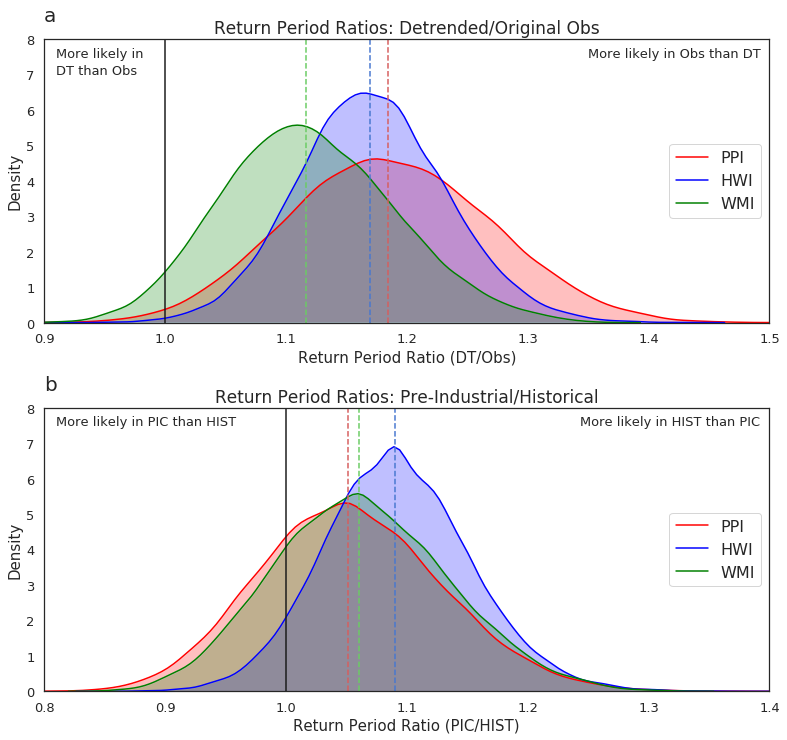

In [35]:
# Figure options

fig = plt.figure(figsize=(13,12))
rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ["Liberation Sans"]
sns.set(style="white", palette="muted", color_codes=True)

## Plot of pre-industrial/historical ratios

ax = fig.add_subplot(2,1,2)
d1 = sns.distplot(list(ppi_hist_cn),hist=False,label="PPI",color="red",kde_kws={"shade": True})
d2 = sns.distplot(list(hwi_hist_cn),hist=False,label="HWI",color="blue",kde_kws={"shade": True})
d3 = sns.distplot(list(wmi_hist_cn),hist=False,label="WMI",color="green",kde_kws={"shade": True})

# Axis titles and text

ax.set_title("Return Period Ratios: Pre-Industrial/Historical",fontsize=17)
ax.set_xlabel("Return Period Ratio (PIC/HIST)",fontsize=15)
ax.set_ylabel("Density",fontsize=15)
ax.set_ylim(0,8)
ax.set_xlim(0.8,1.4)

plt.text(0.81,7.5,"More likely in PIC than HIST",fontsize=13)
plt.text(1.243,7.5,"More likely in HIST than PIC",fontsize=13)

# Vertical lines

plt.axvline(x=1,color="k",linestyle='-')
plt.axvline(x=ppi_hist_cn.median(),color="r",linestyle="--")
plt.axvline(x=hwi_hist_cn.median(),color="b",linestyle="--")
plt.axvline(x=wmi_hist_cn.median(),color="g",linestyle="--")

# Subplot label

plt.text(0.8,8.5,"b",fontsize=20)

# Legend and tick options

ax.legend(["PPI","HWI","WMI"],loc=7,fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=13)

## Plot of DT/obs ratios

ax1 = fig.add_subplot(2,1,1)
d4 = sns.distplot(list(ppi_dt_orig),hist=False,label="PPI",color="red",kde_kws={"shade": True})
d5 = sns.distplot(list(hwi_dt_orig),hist=False,label="HWI",color="blue",kde_kws={"shade": True})
d6 = sns.distplot(list(wmi_dt_orig),hist=False,label="WMI",color="green",kde_kws={"shade": True})

# Title and axis labels

ax1.set_title("Return Period Ratios: Detrended/Original Obs",fontsize=17)
ax1.set_xlabel("Return Period Ratio (DT/Obs)",fontsize=15)
ax1.set_ylabel("Density",fontsize=15)
ax1.set_ylim(0,8)
ax1.set_xlim(0.9,1.5)

# Legend and tick options

ax1.legend(["PPI","HWI","WMI"],loc=7,fontsize=16)
ax1.tick_params(axis='both', which='major', labelsize=13)

# Text

plt.text(0.91,7.5,"More likely in",fontsize=13)
plt.text(0.91,7,"DT than Obs",fontsize=13)
plt.text(1.35,7.5,"More likely in Obs than DT",fontsize=13)
plt.text(0.9,8.5,"a",fontsize=20)

# Vertical lines

plt.axvline(x=1,color="k",linestyle='-')
plt.axvline(x=ppi_dt_orig.median(),color="r",linestyle="--")
plt.axvline(x=hwi_dt_orig.median(),color="b",linestyle="--")
plt.axvline(x=wmi_dt_orig.median(),color="g",linestyle="--")

# Adjust subplot spacing

plt.subplots_adjust(hspace=0.3)

#### Figure 4: HIST and PIC trend boxplots

Read in trend data for each index

In [16]:
trends_hwi_file = pyreadr.read_r(loc_in+"LENS_TRENDS_HWI.rds")
trends_hwi_reverse = trends_hwi_file[None].transpose()
trends_hwi = trends_hwi_reverse[::-1]

trends_ppi_file = pyreadr.read_r(loc_in+"LENS_TRENDS_PPI1.rds")
trends_ppi_reverse = trends_ppi_file[None].transpose()
trends_ppi = trends_ppi_reverse[::-1]

trends_wmi_file = pyreadr.read_r(loc_in+"LENS_TRENDS_WMI.rds")
trends_wmi_reverse = trends_wmi_file[None].transpose()
trends_wmi = trends_wmi_reverse[::-1]

Set observed trend value

In [22]:
obs_trend_hwi = 0.0055
obs_trend_wmi = 0.004
obs_trend_ppi = 0.0057

Plot!

[None, None]

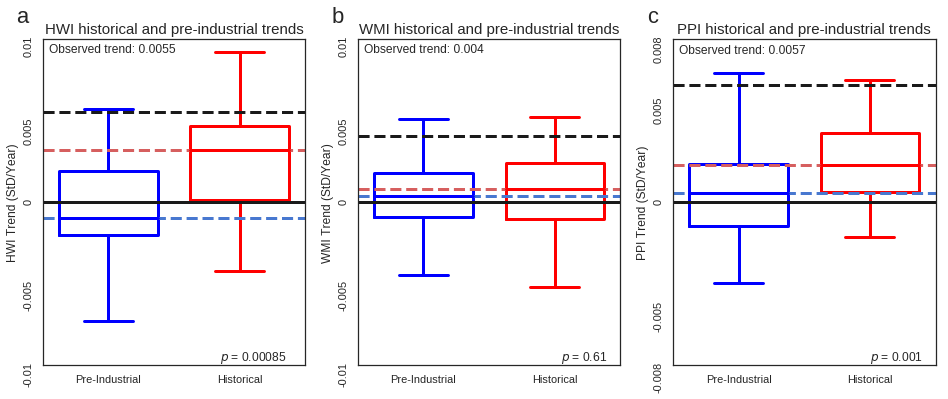

In [36]:
fig = plt.figure(figsize=(16,6))

rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ["Liberation Sans"]

## HWI

ax = fig.add_subplot(1,3,1)
b1 = plt.boxplot(trends_hwi, sym='', labels=["Pre-Industrial","Historical"],widths=0.75)
plt.axhline(y=0,color="k",linestyle="-",linewidth=3)
plt.axhline(y=median(trends_hwi.iloc[0,:]),color="b",linestyle="--",linewidth=3)
plt.axhline(y=median(trends_hwi.iloc[1,:]),color="r",linestyle="--",linewidth=3)
plt.axhline(y=obs_trend_hwi,color="k",linestyle="--",linewidth=3)
ax.set_ylim(-0.01,0.01)
ax.set_ylabel("HWI Trend (StD/Year)",fontsize=12)
plt.yticks([-0.01,-0.005,0,0.005,0.01],["-0.01","-0.005","0","0.005","0.01"],rotation=90)

# Text

plt.title("HWI historical and pre-industrial trends",fontsize=15,family="sans-serif",fontname="Liberation Sans")
plt.text(1.85,-0.0097,"$\it{p}$ = 0.00085",fontsize=12)
plt.text(0.55,0.0092,"Observed trend: "+str(obs_trend_hwi),fontsize=12)
plt.text(0.3,0.011,"a",fontsize=22)

# Boxplot colors

b1["boxes"][0].set(color="blue",linewidth=3)
b1["boxes"][1].set(color="red",linewidth=3)
b1["whiskers"][0].set(color="blue",linewidth=3)
b1["whiskers"][1].set(color="blue",linewidth=3)
b1["whiskers"][2].set(color="red",linewidth=3)
b1["whiskers"][3].set(color="red",linewidth=3)
b1["caps"][0].set(color="blue",linewidth=3)
b1["caps"][1].set(color="blue",linewidth=3)
b1["caps"][2].set(color="red",linewidth=3)
b1["caps"][3].set(color="red",linewidth=3)
b1["medians"][0].set(color="blue",linewidth=3)
b1["medians"][1].set(color="red",linewidth=3)

## WMI

ax1 = fig.add_subplot(1,3,2)
b2 = plt.boxplot(trends_wmi, sym='', labels=["Pre-Industrial","Historical"],widths=0.75)
plt.axhline(y=0,color="k",linestyle="-",linewidth=3)
plt.axhline(y=median(trends_wmi.iloc[0,:]),color="b",linestyle="--",linewidth=3)
plt.axhline(y=median(trends_wmi.iloc[1,:]),color="r",linestyle="--",linewidth=3)
plt.axhline(y=obs_trend_wmi,color="k",linestyle="--",linewidth=3)

ax1.set_ylim(-0.01,0.01)
ax1.set_ylabel("WMI Trend (StD/Year)",fontsize=12)
plt.yticks([-0.01,-0.005,0,0.005,0.01],["-0.01","-0.005","0","0.005","0.01"], rotation=90)

# Text

plt.title("WMI historical and pre-industrial trends",fontsize=15)
plt.text(2.05,-0.0097,"$\it{p}$ = 0.61",fontsize=12)
plt.text(0.55,0.0092,"Observed trend: "+str(obs_trend_wmi),fontsize=12)
plt.text(0.3,0.011,"b",fontsize=22)

# Boxplot colors

b2["boxes"][0].set(color="blue",linewidth=3)
b2["boxes"][1].set(color="red",linewidth=3)
b2["whiskers"][0].set(color="blue",linewidth=3)
b2["whiskers"][1].set(color="blue",linewidth=3)
b2["whiskers"][2].set(color="red",linewidth=3)
b2["whiskers"][3].set(color="red",linewidth=3)
b2["caps"][0].set(color="blue",linewidth=3)
b2["caps"][1].set(color="blue",linewidth=3)
b2["caps"][2].set(color="red",linewidth=3)
b2["caps"][3].set(color="red",linewidth=3)
b2["medians"][0].set(color="blue",linewidth=3)
b2["medians"][1].set(color="red",linewidth=3)

## PPI

ax2 = fig.add_subplot(1,3,3)
b3 = plt.boxplot(trends_ppi, sym='', labels=["Pre-Industrial","Historical"],widths=0.75)
plt.axhline(y=0,color="k",linestyle="-",linewidth=3)
plt.axhline(y=median(trends_ppi.iloc[0,:]),color="b",linestyle="--",linewidth=3)
plt.axhline(y=median(trends_ppi.iloc[1,:]),color="r",linestyle="--",linewidth=3)
plt.axhline(y=obs_trend_ppi,color="k",linestyle="--",linewidth=3)

ax2.set_ylim(-0.008,0.008)
ax2.set_ylabel("PPI Trend (StD/Year)",fontsize=12)
plt.yticks([-0.008,-0.005,0,0.005,0.008],["-0.008","-0.005","0","0.005","0.008"],rotation=90)

# Text

plt.title("PPI historical and pre-industrial trends",fontsize=15)
plt.text(2,-0.00779,"$\it{p}$ = 0.001",fontsize=12)
plt.text(0.55,0.0073,"Observed trend: "+str(obs_trend_ppi),fontsize=12)
plt.text(0.3,0.0088,"c",fontsize=22)

# Boxplot colors
b3["boxes"][0].set(color="blue",linewidth=3)
b3["boxes"][1].set(color="red",linewidth=3)
b3["whiskers"][0].set(color="blue",linewidth=3)
b3["whiskers"][1].set(color="blue",linewidth=3)
b3["whiskers"][2].set(color="red",linewidth=3)
b3["whiskers"][3].set(color="red",linewidth=3)
b3["caps"][0].set(color="blue",linewidth=3)
b3["caps"][1].set(color="blue",linewidth=3)
b3["caps"][2].set(color="red",linewidth=3)
b3["caps"][3].set(color="red",linewidth=3)
b3["medians"][0].set(color="blue",linewidth=3)
b3["medians"][1].set(color="red",linewidth=3)


#### Figure 5: Boxplots of the internal variability contribution

Add data

In [25]:
iv_hwi_file = pyreadr.read_r(loc_in+"IV_PERCENTS_HWI.rds")
iv_hwi_list = iv_hwi_file[None].values.tolist()
iv_hwi = [item for sublist in iv_hwi_list for item in sublist]

iv_wmi_file = pyreadr.read_r(loc_in+"IV_PERCENTS_WMI.rds")
iv_wmi_list = iv_wmi_file[None].values.tolist()
iv_wmi = [item for sublist in iv_wmi_list for item in sublist]

iv_ppi_file = pyreadr.read_r(loc_in+"IV_PERCENTS_PPI1.rds")
iv_ppi_list = iv_ppi_file[None].values.tolist()
iv_ppi = [item for sublist in iv_ppi_list for item in sublist]

Plot!

Text(0.5, 1.0, 'CESM-LE realizations: Ratio of forced trend to internal variability')

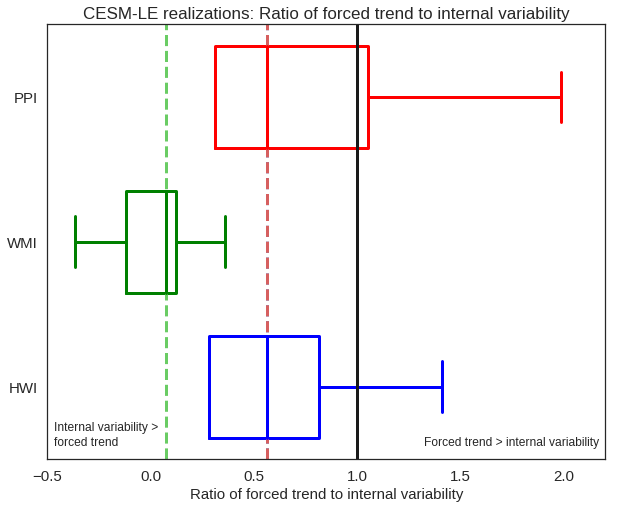

In [37]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ["Liberation Sans"]

# Plot each in one command
b1 = plt.boxplot([iv_hwi,iv_wmi,iv_ppi],vert=False,widths=0.7,sym="")
plt.xlim(-0.5,2.2)

# Axis options

ax.set_yticklabels(["HWI","WMI","PPI"],fontsize=15)
plt.xticks([-0.5,0,0.5,1,1.5,2],fontsize=15)

# Boxplot colors
# PPI = red
# WMI = green
# HWI = blue
# As in figure 3

b1["boxes"][0].set(color="blue",linewidth=3)
b1["boxes"][1].set(color="green",linewidth=3)
b1["boxes"][2].set(color="red",linewidth=3)
b1["whiskers"][0].set(color="blue",linewidth=3)
b1["whiskers"][1].set(color="blue",linewidth=3)
b1["whiskers"][2].set(color="green",linewidth=3)
b1["whiskers"][3].set(color="green",linewidth=3)
b1["whiskers"][4].set(color="red",linewidth=3)
b1["whiskers"][5].set(color="red",linewidth=3)
b1["caps"][0].set(color="blue",linewidth=3)
b1["caps"][1].set(color="blue",linewidth=3)
b1["caps"][2].set(color="green",linewidth=3)
b1["caps"][3].set(color="green",linewidth=3)
b1["caps"][4].set(color="red",linewidth=3)
b1["caps"][5].set(color="red",linewidth=3)
b1["medians"][0].set(color="blue",linewidth=3)
b1["medians"][1].set(color="green",linewidth=3)
b1["medians"][2].set(color="red",linewidth=3)

# Text

plt.text(-0.47,0.7,"Internal variability >",fontsize=12)
plt.text(-0.47,0.6,"forced trend",fontsize=12)
plt.text(1.32,0.6,"Forced trend > internal variability",fontsize=12)
plt.xlabel("Ratio of forced trend to internal variability",fontsize=15)

# Vertical lines

plt.axvline(x=1,color="k",linestyle="-",linewidth=3)
plt.axvline(x=median(iv_hwi),color="b",linestyle="--",linewidth=3)
plt.axvline(x=median(iv_wmi),color="g",linestyle="--",linewidth=3)
plt.axvline(x=median(iv_ppi),color="r",linestyle="--",linewidth=3)

# Title
plt.title("CESM-LE realizations: Ratio of forced trend to internal variability",fontsize=17)
